In [136]:
# Chaitanya Mangla AI - DS B1 
# Car insurance Claim Prediction 
# Predict whether a customer will make an insurancce claimmnext year 9 feature: Age, car age, annual premium, region, previous claimsetc)

In [137]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [138]:
# Making the Synthetic dataset 
np.random.seed(42)
n = 5000
data = pd.DataFrame({
    'Age': np.random.randint(18, 70, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Vehicle_Age': np.random.randint(1, 15, n),
    'Vehicle_Type': np.random.choice(['Sedan', 'SUV', 'Truck'], n),
    'Annual_Premium': np.random.randint(20000, 80000, n),
    'Region_Code': np.random.randint(1, 50, n),
    'Driving_Experience': np.random.randint(1, 30, n),
    'Previous_Claims': np.random.randint(0, 5, n),
    'Policy_Tenure': np.random.randint(1, 10, n)
})
data
# The whole data is printed in tabular form 


,Age,Gender,Vehicle_Age,Vehicle_Type,Annual_Premium,Region_Code,Driving_Experience,Previous_Claims,Policy_Tenure
0,56,Male,6,Sedan,73974,44,22,3,9
1,69,Female,5,Truck,36925,48,12,0,7
2,46,Female,1,Sedan,26033,23,17,4,7
3,32,Male,6,Truck,22665,6,24,2,7
4,60,Male,1,Sedan,47025,24,14,3,2
...,...,...,...,...,...,...,...,...,...
4995,24,Male,9,Truck,27944,14,19,2,8
4996,66,Female,10,SUV,68702,10,12,0,2
4997,26,Female,3,Truck,32747,45,23,3,1
4998,53,Female,8,SUV,30505,33,29,4,4


In [139]:
# Simulated Trget = Probability of claim increases with the previous claims, vehicles, age etc 
data['Claim'] = (data['Previous_Claims']*0.2 + (data['Vehicle_Age'] / 15 * 0.3) +
    (np.random.rand(n) * 0.2)
)
data['Claim'] = (data['Claim'] > 0.35).astype(int)

data.head() 
# The claim column is added in teh table 



,Age,Gender,Vehicle_Age,Vehicle_Type,Annual_Premium,Region_Code,Driving_Experience,Previous_Claims,Policy_Tenure,Claim
0,56,Male,6,Sedan,73974,44,22,3,9,1
1,69,Female,5,Truck,36925,48,12,0,7,0
2,46,Female,1,Sedan,26033,23,17,4,7,1
3,32,Male,6,Truck,22665,6,24,2,7,1
4,60,Male,1,Sedan,47025,24,14,3,2,1


In [140]:
# Encoding the categorical variabes 
data = pd.get_dummies(data, columns=['Gender', 'Vehicle_Type'], drop_first=True)
data
# The categorical data gets converted to Numerical type  

,Age,Vehicle_Age,Annual_Premium,Region_Code,Driving_Experience,Previous_Claims,Policy_Tenure,Claim,Gender_Male,Vehicle_Type_Sedan,Vehicle_Type_Truck
0,56,6,73974,44,22,3,9,1,True,True,False
1,69,5,36925,48,12,0,7,0,False,False,True
2,46,1,26033,23,17,4,7,1,False,True,False
3,32,6,22665,6,24,2,7,1,True,False,True
4,60,1,47025,24,14,3,2,1,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,24,9,27944,14,19,2,8,1,True,False,True
4996,66,10,68702,10,12,0,2,1,False,False,False
4997,26,3,32747,45,23,3,1,1,False,False,True
4998,53,8,30505,33,29,4,4,1,False,False,False


In [141]:
# Split into dependent and independent features
X = data.drop('Claim', axis=1)
y = data['Claim']

In [142]:
X # X dataset is being printed here 

,Age,Vehicle_Age,Annual_Premium,Region_Code,Driving_Experience,Previous_Claims,Policy_Tenure,Gender_Male,Vehicle_Type_Sedan,Vehicle_Type_Truck
0,56,6,73974,44,22,3,9,True,True,False
1,69,5,36925,48,12,0,7,False,False,True
2,46,1,26033,23,17,4,7,False,True,False
3,32,6,22665,6,24,2,7,True,False,True
4,60,1,47025,24,14,3,2,True,True,False
...,...,...,...,...,...,...,...,...,...,...
4995,24,9,27944,14,19,2,8,True,False,True
4996,66,10,68702,10,12,0,2,False,False,False
4997,26,3,32747,45,23,3,1,False,False,True
4998,53,8,30505,33,29,4,4,False,False,False


In [143]:
y  # The data y is being prited here 

0       1
1       0
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: Claim, Length: 5000, dtype: int64

In [144]:
# Trian test and split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [145]:
X_train # Data on which the model is trained 

,Age,Vehicle_Age,Annual_Premium,Region_Code,Driving_Experience,Previous_Claims,Policy_Tenure,Gender_Male,Vehicle_Type_Sedan,Vehicle_Type_Truck
2502,38,12,61800,38,26,3,3,False,False,False
4448,21,13,37221,21,24,2,6,False,True,False
1782,51,9,28117,5,12,0,2,True,True,False
3194,68,13,53427,10,26,1,3,True,False,True
2884,28,10,78334,1,9,4,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...
2681,20,3,78609,34,28,4,7,True,False,False
3866,24,5,55939,12,12,0,5,False,False,False
4222,28,2,39861,38,29,3,6,False,False,True
1478,34,4,76088,12,16,2,7,True,True,False


In [146]:
X_test # Data on which the model is tested

,Age,Vehicle_Age,Annual_Premium,Region_Code,Driving_Experience,Previous_Claims,Policy_Tenure,Gender_Male,Vehicle_Type_Sedan,Vehicle_Type_Truck
3402,23,4,61604,34,21,3,9,False,False,False
1601,36,3,23089,17,7,3,6,False,False,True
3348,39,2,31848,5,20,2,2,False,True,False
3792,46,13,77558,34,25,2,2,True,True,False
1071,21,11,63950,16,28,0,5,True,True,False
...,...,...,...,...,...,...,...,...,...,...
4907,58,13,45280,5,16,0,1,True,False,True
1710,62,6,32631,3,18,0,2,False,False,False
3732,58,11,76679,20,14,2,7,False,True,False
639,58,9,78755,37,13,2,9,True,False,True


In [147]:
y_train # Data on which the model is trained

2502    1
4448    1
1782    0
3194    1
2884    1
       ..
2681    1
3866    0
4222    1
1478    1
793     1
Name: Claim, Length: 4000, dtype: int64

In [148]:
y_test  # Data on which the model is tested 

3402    1
1601    1
3348    1
3792    1
1071    0
       ..
4907    1
1710    0
3732    1
639     1
3880    1
Name: Claim, Length: 1000, dtype: int64

In [149]:
# Scaling the features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [150]:
X_train_scaled 

array([[-0.37745591,  1.10033821,  0.68185175, ..., -1.00551521,
        -0.70300067, -0.71055675],
       [-1.51563167,  1.34824589, -0.73629409, ..., -1.00551521,
         1.42247376, -0.71055675],
       [ 0.49291379,  0.35661519, -1.26157176, ...,  0.99451504,
         1.42247376, -0.71055675],
       ...,
       [-1.04697106, -1.37873853, -0.5839728 , ..., -1.00551521,
        -0.70300067,  1.40734713],
       [-0.64526197, -0.88292318,  1.50623304, ...,  0.99451504,
         1.42247376, -0.71055675],
       [-1.38172863,  1.34824589, -0.30662112, ..., -1.00551521,
        -0.70300067, -0.71055675]], shape=(4000, 10))

In [151]:
X_test_scaled 

array([[-1.38172863, -0.88292318,  0.67054305, ..., -1.00551521,
        -0.70300067, -0.71055675],
       [-0.51135894, -1.13083086, -1.55167458, ..., -1.00551521,
        -0.70300067,  1.40734713],
       [-0.31050439, -1.37873853, -1.04630254, ..., -1.00551521,
         1.42247376, -0.71055675],
       ...,
       [ 0.9615744 ,  0.85243054,  1.54033224, ..., -1.00551521,
         1.42247376, -0.71055675],
       [ 0.9615744 ,  0.35661519,  1.66011217, ...,  0.99451504,
        -0.70300067,  1.40734713],
       [ 1.36328349,  0.60452286, -1.69591823, ...,  0.99451504,
        -0.70300067, -0.71055675]], shape=(1000, 10))

In [152]:
from xgboost import XGBClassifier 
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [153]:
# Evaluating the model 
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1] 


In [154]:
y_pred # here are all the predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [155]:
y_prob # Here are alll teh probabilities 

array([0.01004553, 0.00788804, 0.01265904, 0.01265904, 0.01265904,
       0.00788804, 0.01265904, 0.00788804, 0.01004553, 0.01265904,
       0.01004553, 0.01265904, 0.00788804, 0.9524621 , 0.01265904,
       0.00788804, 0.00788804, 0.01004553, 0.01004553, 0.95629096,
       0.9524621 , 0.01004553, 0.95629096, 0.00788804, 0.01004553,
       0.01265904, 0.00788804, 0.01004553, 0.01265904, 0.9465911 ,
       0.01004553, 0.01004553, 0.00788804, 0.9524621 , 0.95629096,
       0.01004553, 0.01004553, 0.9524621 , 0.00788804, 0.00788804,
       0.01265904, 0.01004553, 0.00788804, 0.00788804, 0.01265904,
       0.00788804, 0.01265904, 0.00788804, 0.9465911 , 0.9465911 ,
       0.01004553, 0.00788804, 0.00788804, 0.01004553, 0.01004553,
       0.00788804, 0.00788804, 0.9524621 , 0.01004553, 0.9524621 ,
       0.01265904, 0.01265904, 0.01004553, 0.01265904, 0.01004553,
       0.01004553, 0.01265904, 0.9465911 , 0.01004553, 0.01004553,
       0.01004553, 0.95629096, 0.01265904, 0.00788804, 0.00788

In [156]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [157]:
print("Accuracy:" , accuracy_score(y_test, y_pred)) 


Accuracy: 0.421


In [158]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.26      1.00      0.41       200
           1       1.00      0.28      0.43       800

    accuracy                           0.42      1000
   macro avg       0.63      0.64      0.42      1000
weighted avg       0.85      0.42      0.43      1000



In [159]:
print("ROC AUC Score\n", roc_auc_score(y_test, y_prob)) 

ROC AUC Score
 0.6541124999999999


In [160]:
print("Confusion matrix\n", confusion_matrix(y_test, y_pred))

Confusion matrix
 [[200   0]
 [579 221]]



🔍 Feature Importance:
              Feature  Importance
5     Previous_Claims    0.818947
1         Vehicle_Age    0.085552
8  Vehicle_Type_Sedan    0.014198
3         Region_Code    0.012185
9  Vehicle_Type_Truck    0.012156
4  Driving_Experience    0.012020
0                 Age    0.011677
2      Annual_Premium    0.011574
6       Policy_Tenure    0.011522
7         Gender_Male    0.010170


C:\Users\91981\AppData\Local\Temp\ipykernel_26576\3717045524.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')


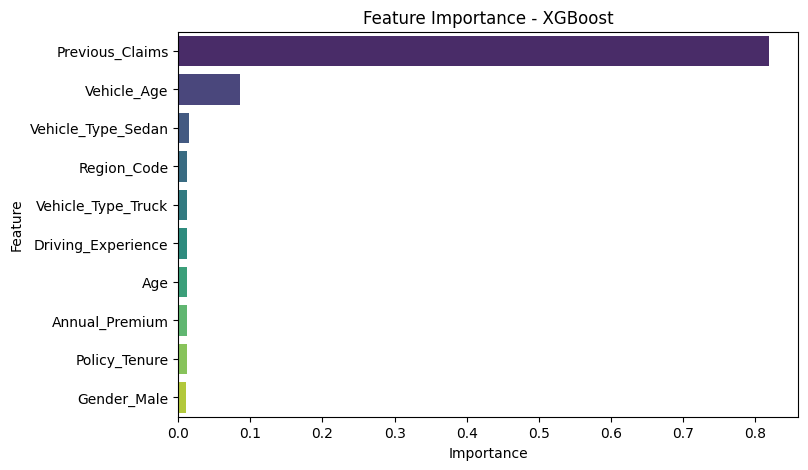

In [161]:
# Feature Importance 
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n🔍 Feature Importance:")
print(importance)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - XGBoost")
plt.show()

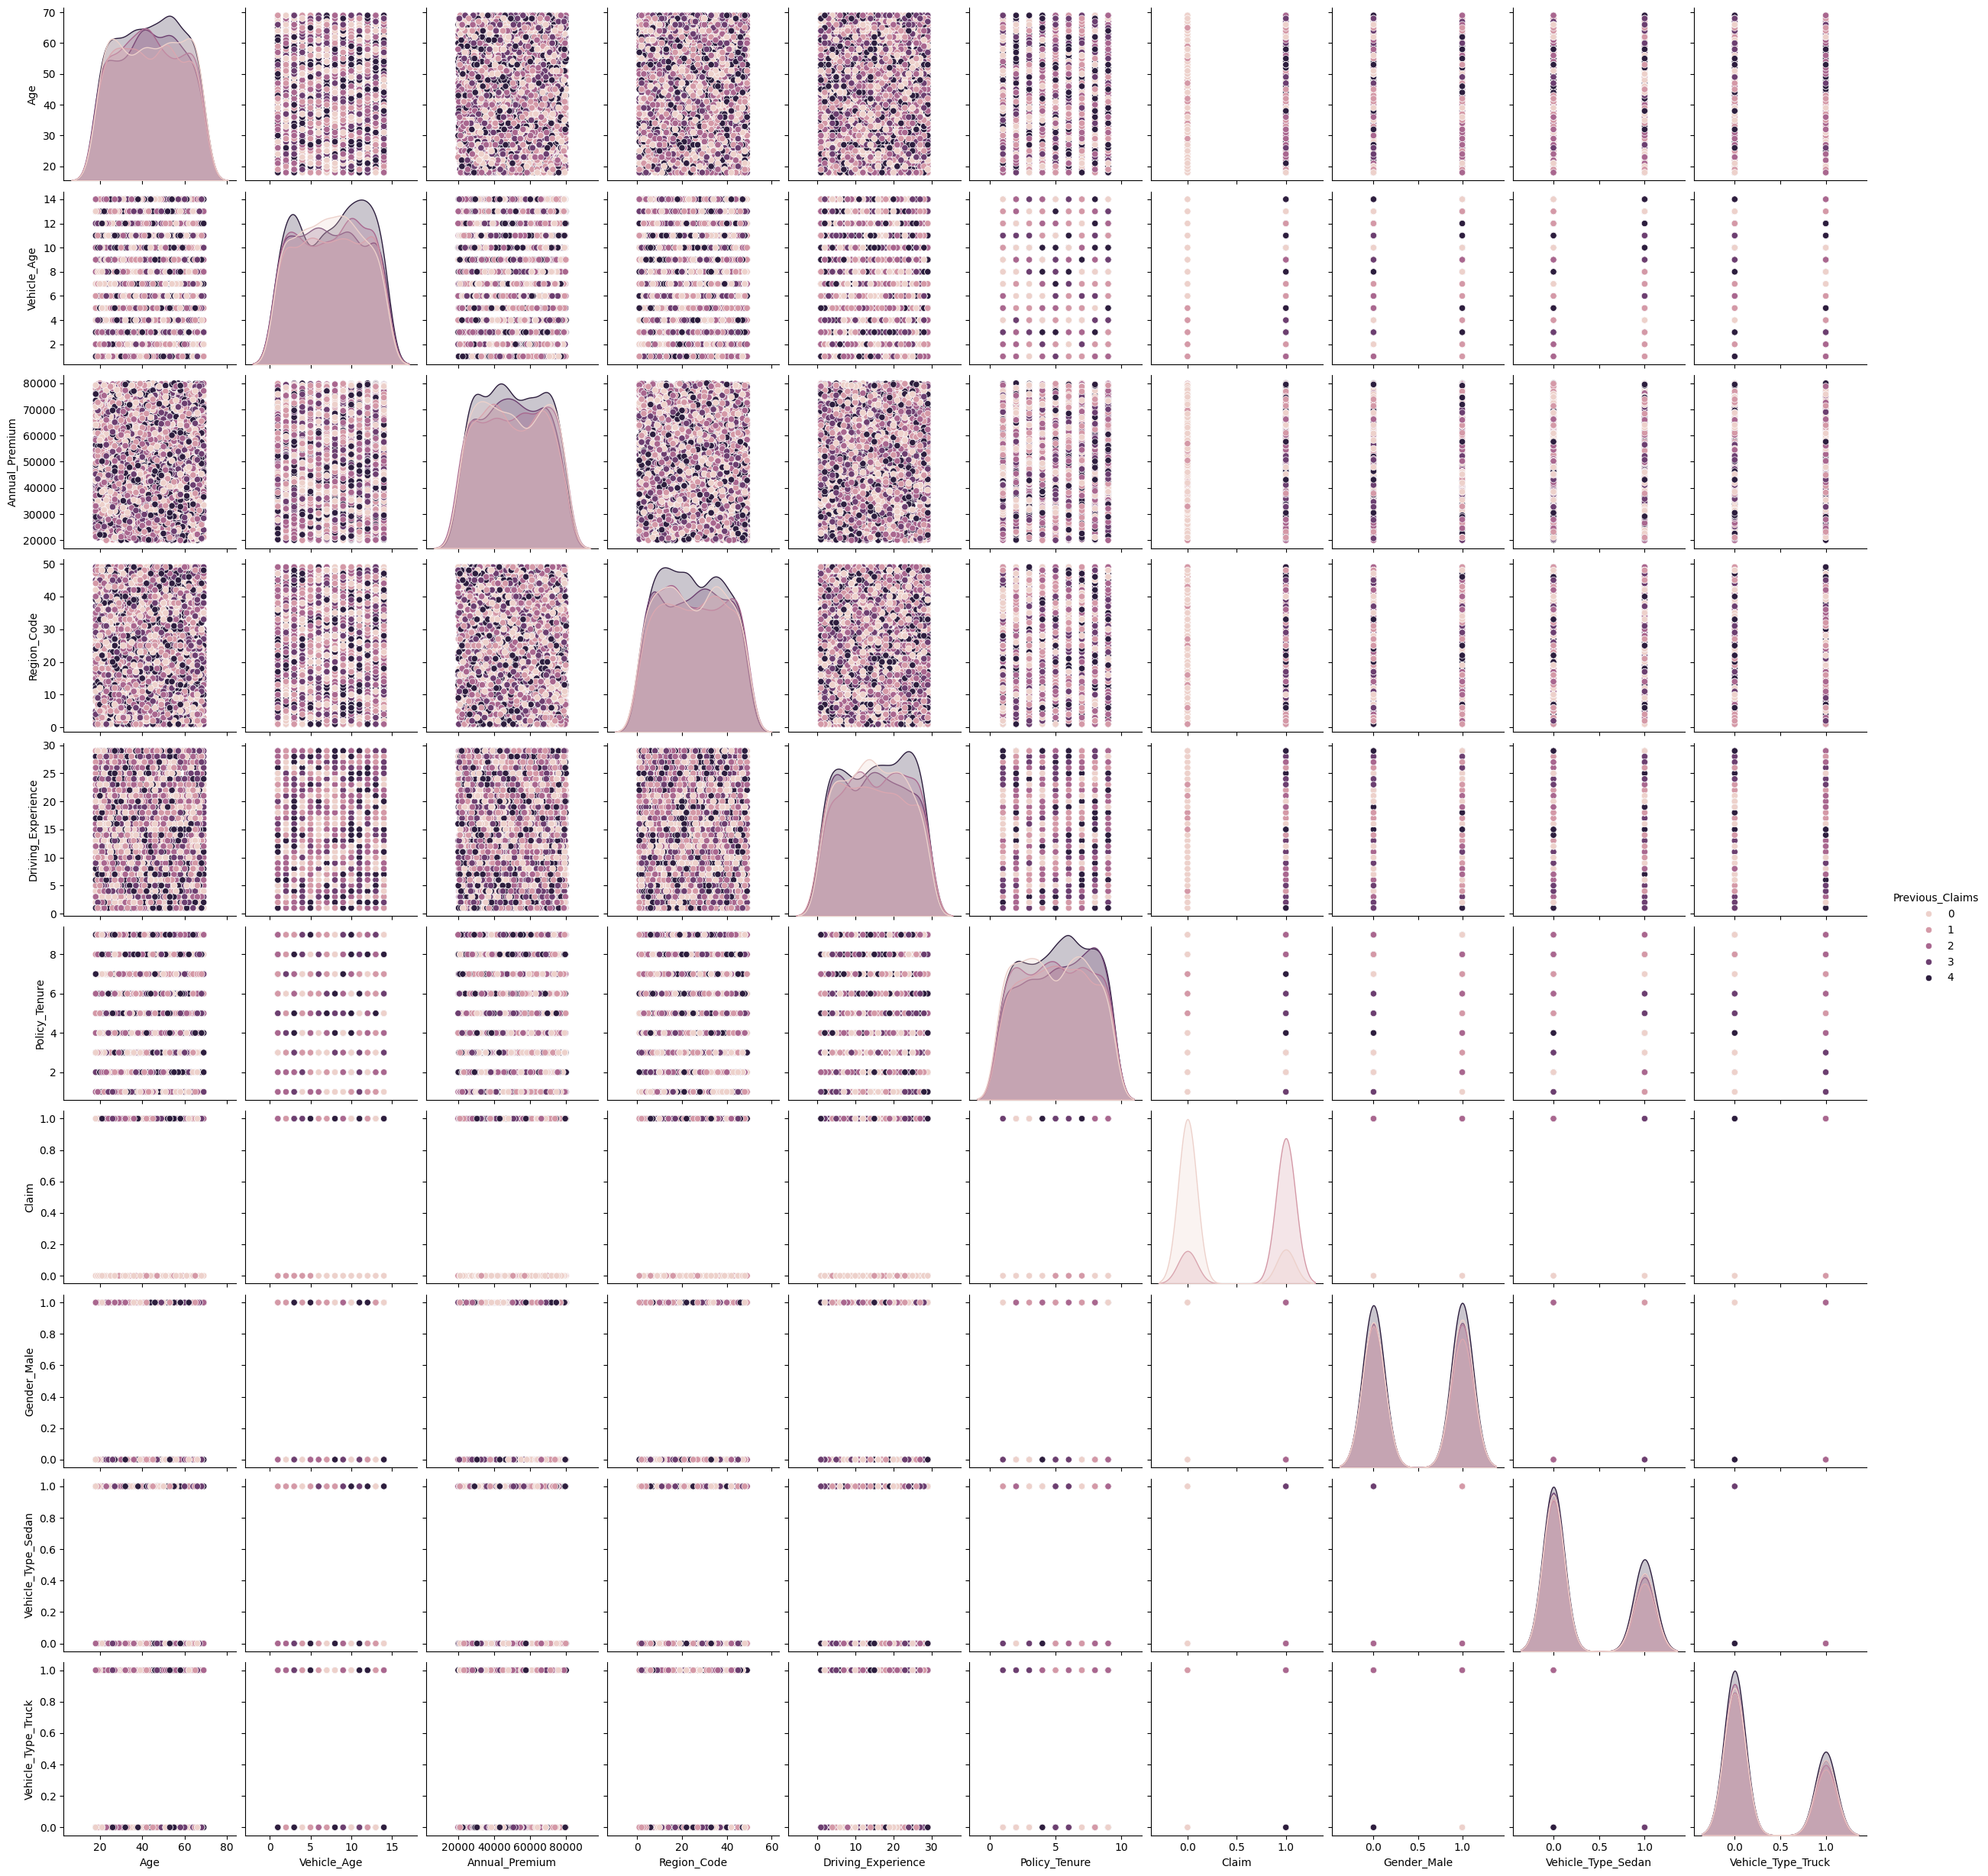

In [162]:
sns.pairplot(data, hue='Previous_Claims') 

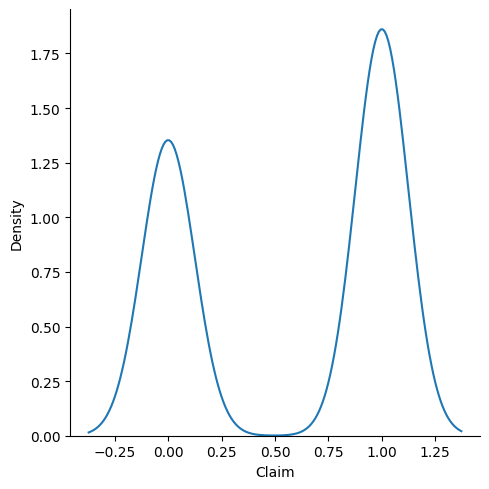

In [163]:
sns.displot(y_test-y_pred,  kind='kde')

In [170]:
# New data with same columns as training set
new_customers = pd.DataFrame({
    'Age': [28, 45, 36, 62, 50],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Male'],
    'Vehicle_Age': [2, 8, 5, 12, 4],
    'Vehicle_Type': ['Sedan', 'SUV', 'Truck', 'SUV', 'Sedan'],
    'Annual_Premium': [35000, 62000, 47000, 55000, 40000],
    'Region_Code': [14, 27, 35, 9, 22],
    'Driving_Experience': [4, 20, 10, 35, 15],
    'Previous_Claims': [0, 1, 2, 3, 0],
    'Policy_Tenure': [2, 6, 4, 9, 5]
})

print(new_customers)
  
# Encode categorical features using same encoders from training

new_customers = pd.get_dummies(new_customers, columns=['Gender', 'Vehicle_Type'], drop_first=True) 

# Ensure same column order as training
new_customers = new_customers[X.columns]

# Scale features using the same scaler
new_customers_scaled = scaler.fit_transform(new_customers)

# Predict class and probability
preds = model.predict(new_customers_scaled)
probs = model.predict_proba(new_customers_scaled)[:, 1]

# Add predictions to the DataFrame
new_customers['Predicted_Claim'] = preds
new_customers['Claim_Probability'] = probs

print("\n Prediction Results:")
print(new_customers)





   Age  Gender  Vehicle_Age Vehicle_Type  Annual_Premium  Region_Code  \
0   28  Female            2        Sedan           35000           14   
1   45    Male            8          SUV           62000           27   
2   36    Male            5        Truck           47000           35   
3   62  Female           12          SUV           55000            9   
4   50    Male            4        Sedan           40000           22   

   Driving_Experience  Previous_Claims  Policy_Tenure  
0                   4                0              2  
1                  20                1              6  
2                  10                2              4  
3                  35                3              9  
4                  15                0              5  

 Prediction Results:
   Age  Vehicle_Age  Annual_Premium  Region_Code  Driving_Experience  \
0   28            2           35000           14                   4   
1   45            8           62000           27           